# MONTE CARLO - MCMC SANS BIAIS

#### Importation des packages 

In [2]:
import numpy as np
from scipy import stats
from scipy.stats import invgamma
from scipy.special import gamma
from scipy.stats import gamma
import plotly as plt 
import plotly.graph_objects as go
import pandas as pd 
import random 
import plotly.express as px 
from scipy.stats import norm
import numpy as np
import scipy.stats as st

# Question 1

## Introduction



#### 1) Objectif

Mise en place de l'algorithme de Gibbs proposé dans la question C de l'article


#### 2) Enoncé 

Dans le modèle, chaque Zn est supposé suivre une loi normale N(θn, V ) où V est fixé à 0,00434. Ensuite, θn est supposé suivre une loi normale N(μ, A), et A suit une Gamma inverse (a, b), avec a = -1 et b = 2. Enfin, la valeur initiale de l'algorithme de Gibbs est la moyenne empirique des (Zn)

Les (Zn) n = [1,18] correspondent aux "moyennes à la bate"

NB : La moyenne à la batte est égal au rapport du nombre de coups sûrs sur le nombre de présences au bâton 

In [3]:
# Données enoncé

Z = np.array([0.395, 0.375, 0.355, 0.334, 0.313, 0.313, 0.291, 0.269, 0.247, 0.247, 0.224, 0.224,
              0.224, 0.224, 0.224, 0.200, 0.175, 0.148])

V = 0.00434

## a) Fonctions

In [4]:
# Densité d'une loi Gamma inverse 

class invgamma(stats.rv_continuous):
    
    def _pdf(x,alpha,beta):
        px = (beta**alpha)/gamma(alpha)*x**(-alpha-1)*np.exp(-beta/x)
        return px
 
    
# Algorithme de Gibbs     
    
def Gibbs(N,Z,V):
    #initiation
    the = np.empty((N+1,len(Z)))
    A = np.empty((N+1,1))
    mu = np.empty((N+1,1))
    the[0] = Z.mean()
    A[0] =  invgamma.rvs(size=1, alpha = 7.5, beta = 2 + np.var(the[0])/2)
    mu[0] = np.random.normal(loc = the[0].mean(),scale = A[0]/len(Z))
    for k in range (0,N,1):
        the[k+1] = np.random.normal(loc = ((mu[k]*V+Z*A[k])/(V+A[k])),scale = (A[k]*V)/(A[k]+V))
        A[k+1] =  invgamma.rvs(size=1, alpha = 7.5, beta = 2 + np.var(the[k])/2)
        mu[k+1] = np.random.normal(loc = the[k].mean(),scale = A[k]/len(Z))
    return([the,A,mu])


# Représentation Graphique des output de l'algorithme de Gibbs

def graph(DataFrame):
    fig = go.Figure()  
    t = []
    for col in DataFrame.columns : 
        t.append(DataFrame[col].mean())
    for i in range(0,N,1):
        fig.add_scattergl(x=list(range(1,len(Z)+1)), y=sample[i])
    fig.add_scattergl(x=list(range(1,len(Z)+1)), y=t,line={'color': 'black'})
    fig.add_scattergl(x=list(range(1,len(Z)+1)), y=Z,line={'color': 'red'})
    fig.show()

# [Erreur sur le invgamma.rvs ; à ajouter dans la Class ?? ]

## b) Implémentation - Graphiques

#### Représentation graphique de [ à compléter] 

In [ ]:
N = 1000 
sample = Gibbs(N,Z,V)
graph(pd.DataFrame(sample[0]))

#fig = go.Figure()
#fig.add_scattergl(x=list(range(1,len(Z)+1)), y=t,line={'color': 'black'})
#fig.add_scattergl(x=list(range(1,len(Z)+1)), y=Z,line={'color': 'red'})
#fig.show()

#### Histogrammes de A et μ 

In [ ]:
df1 = pd.DataFrame(sample[1])
fig = px.histogram(df1, x=0) 
fig.show()

df2 = pd.DataFrame(sample[2])
fig = px.histogram(df2, x=0) 
fig.show()

# [Interprétation et peut-être tableau de coût variance]

# Question 2 

### Algorithme d'acceptation - rejet : 

#### 1) Objectif : 

La méthode de rejet est utilisée pour simuler indirectement une variable aléatoire X, de densité de probabilité f, lorsqu'on ne sait pas simuler directement la loi de densité de probabilité f


#### 2) Méthode : 

Supposons une densité f à simuler. Le principe de la méthode consiste à imiter f par une
densité g facilement simulable. Soit g cette densité que l’on sait simuler. Supposons f(x) ≤
Mg(x), M > 1.

La procédure fournit des variables aléatoires distribuées suivant f : 
    
    1. Générer x ∼ g, u ∼ U[0,1];
    
    2. Si u ≤ f(x)/Mg(x), accepter y = x ;
    
    sinon retourner en 1.
    
### Maximal coupling 

#### 1) Objectif : 

Un maximal coupling entre deux distributions p et q sur un espace X est une distribution d'un couple de variables aléatoires (X,Y) qui maximise P(X=Y), sous réserve des contraintes marginales X∼p et Y ∼ q. L'algorithme permet donc de simuler une simulation la loi jointe de 2 variables X et Y à partir de leur distribution marginale. 


#### 2) Méthode : 

    1. Echantilloner X ∼ p et Echantilloner W|X ∼ U([0,p(X)]). Si W ≤ q(X), retourner (X,X).
    
    2. Sinon, Echantilloner Y⋆ ∼q et W⋆|Y⋆ ∼U([0,q(Y⋆)]) jusqu'à ce que W⋆ > p(Y⋆), et retourner(X,Y⋆)


### Lien entre les deux méthodes  

L'étape 2 de l'algorithme de maximal coupling utilise la méthode classique d'acceptation rejet.



# [Explication page 11 du papier à synthétiser]

## Illustration du Maximal coupling 

Pour comprendre l'algorithme, regardons le graphique suivant, où les fonctions de densité de p et q sont tracées avec une zone ombrée sous la courbe x -> min(p(x),q(x)). L'algorithme essaie d'abord d'échantillonner à partir de la distribution représentée par la zone ombrée, et s'il n'y parvient pas, il échantillonne Y à partir du reste qui a une densité x -> q(x) - min(p(x),q(x)), jusqu'à une constante de normalisation. 



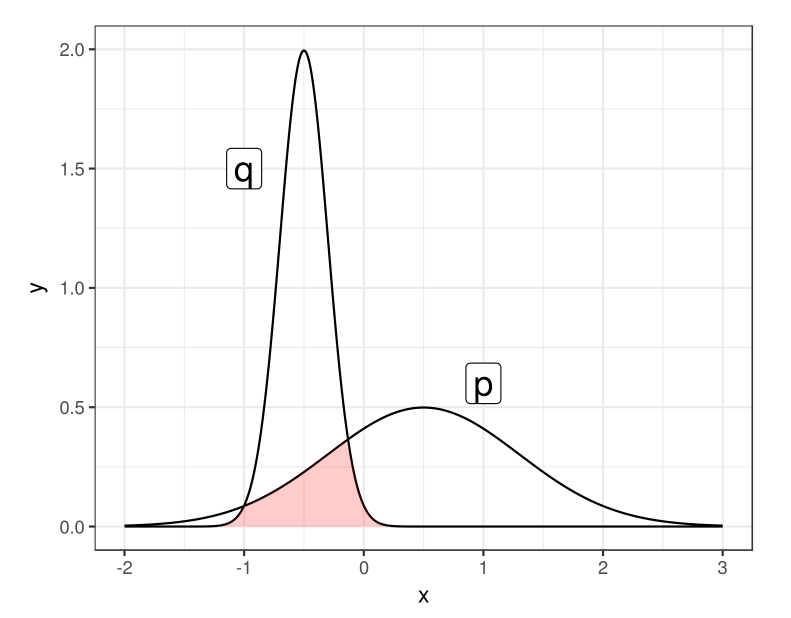

In [ ]:
def maximal_coupling():
    X = gamma.rvs(1)
    W = norm.rvs(loc=0,scale=1) * gamma.pdf(X,a=1)
    if W < norm.pdf(X,loc=1,scale=1):
        return X, X
    else:
        while True:
            Y = norm.rvs(loc=1,scale=1)
            W = norm.rvs(loc=0,scale=1) * norm.pdf(Y,loc=1,scale=1)
            if W > gamma.pdf(Y,a=1):
                return [X,Y]


listXY = pd.DataFrame([maximal_coupling() for _ in range (10000)])


plot = px.Figure(data=[px.Scatter( x = listXY[0], y = listXY[1], mode = 'markers',) ]) 
plot.show()

In [ ]:
def maximal_coupling2():
    X = norm.rvs(loc=0,scale=1)
    W = norm.rvs(loc=0,scale=1) * norm.pdf(X,loc=0,scale=1)
    if W < norm.pdf(X,loc=0,scale=1):
        return X, X
    else:
        while True:
            Y = norm.rvs(loc=0,scale=1)
            W = norm.rvs(loc=0,scale=1) * norm.pdf(Y,loc=0,scale=1)
            if W > norm.pdf(Y,loc=0,scale=1):
                return [X,Y]


listXY = pd.DataFrame([maximal_coupling2() for _ in range (10000)])


plot = px.Figure(data=[px.Scatter( x = listXY[0], y = listXY[1], mode = 'markers',) ]) 
plot.show()

# Question 3 